# Step 1: Importing the required python packages
* We need Pandas for data manipulation, NumPy for mathematical calculations, MatplotLib and Seaborn for visualizations.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 2: Loading the dataset
- Download the dataset, upload it to your notebook and read it into the pandas dataframe.

In [5]:
start= pd.read_csv("C:/Users/Shreeji/Desktop/50_Startups.csv")
start.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

# Step 3: Data analysis
- Now that we have our data ready, let's analyze and understand its trend in detail. To do that we can first describe the data below -

In [8]:
start.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [10]:
start.isnull().sum()  #checking for null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
start.duplicated().sum() #checking if there are any repeated values in the dataset 

0

# Step 4: Outlier detection

<Axes: xlabel='R&D Spend'>

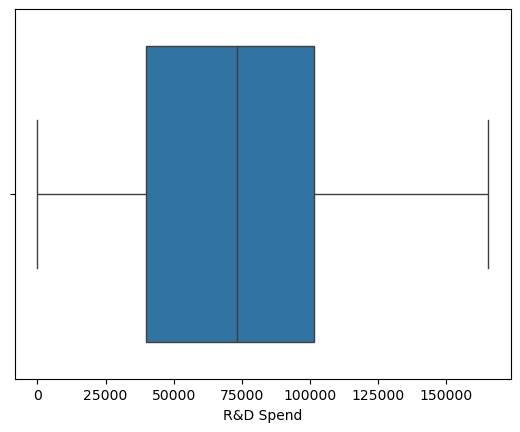

In [15]:
sns.boxplot(x="R&D Spend", data=start)

<Axes: xlabel='Administration'>

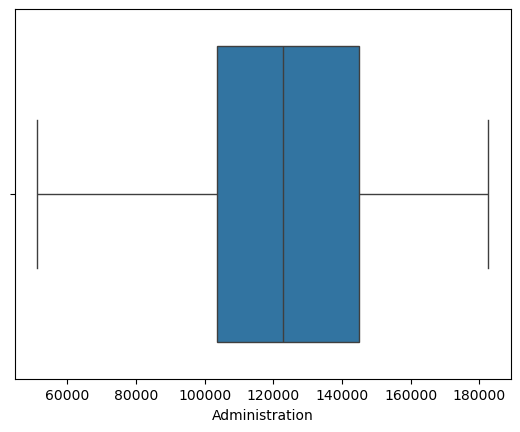

In [16]:
sns.boxplot(x="Administration", data=start)

<Axes: xlabel='R&D Spend'>

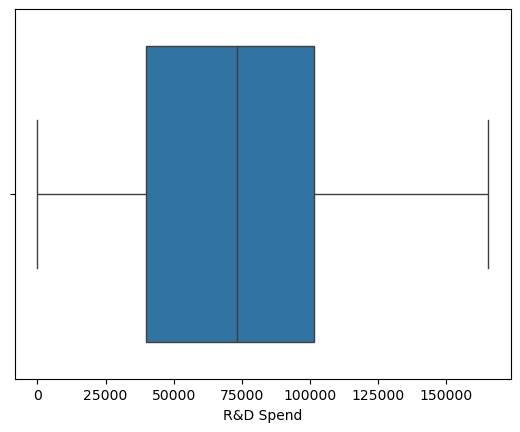

In [17]:
sns.boxplot(x="R&D Spend", data=start)

<Axes: xlabel='Marketing Spend'>

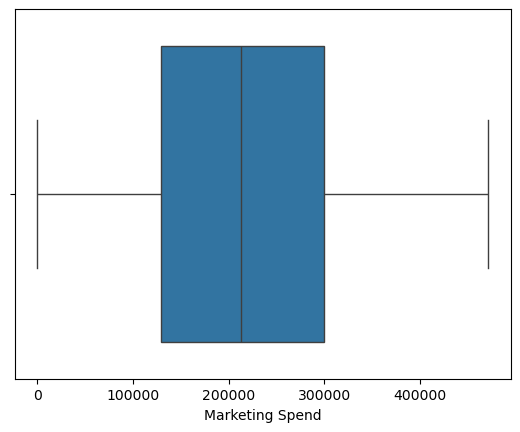

In [18]:
sns.boxplot(x="Marketing Spend", data=start)

<Axes: xlabel='Profit'>

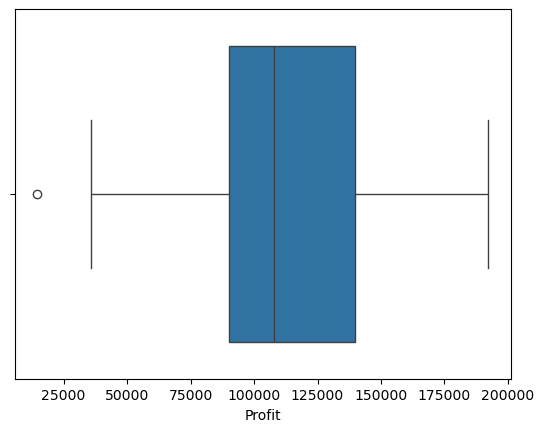

In [21]:
sns.boxplot(x="Profit", data=start)

we can see that there is an outlier in profit column, so we'll be removing the outlier

In [23]:
Q1= start['Profit'].quantile(0.25)
Q1

90138.9025

In [25]:
Q3= start['Profit'].quantile(0.75)
Q3

139765.97749999998

In [26]:
IQR= Q3-Q1 #finding the interquartile range
IQR

49627.07499999998

In [28]:
Lower_Threshold= Q1-1.5*IQR
Lower_Threshold

15698.290000000023

In [32]:
Upper_Threshold= Q3+1.5*IQR
Upper_Threshold

214206.58999999997

In [35]:
start_fil= start[(start['Profit']>=15698.290000000023) & (start['Profit']<=214206.58999999997)] 
#removing the outliers. i.e: the values above upper threshold and below lower threshold

In [48]:
startup= start_fil.copy() #creating a copy so the original dataframe isn't altered

<Axes: xlabel='Profit'>

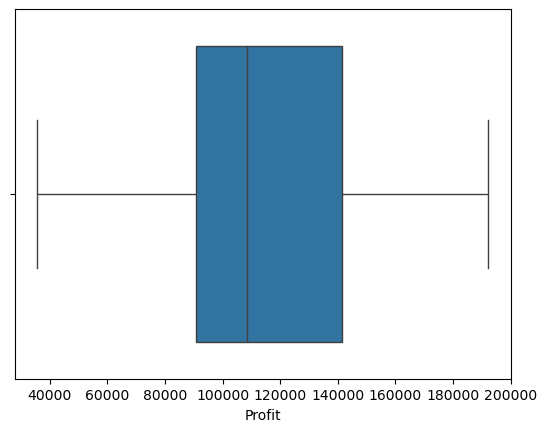

In [46]:
sns.boxplot(x="Profit", data=startup) #final graph without outliers

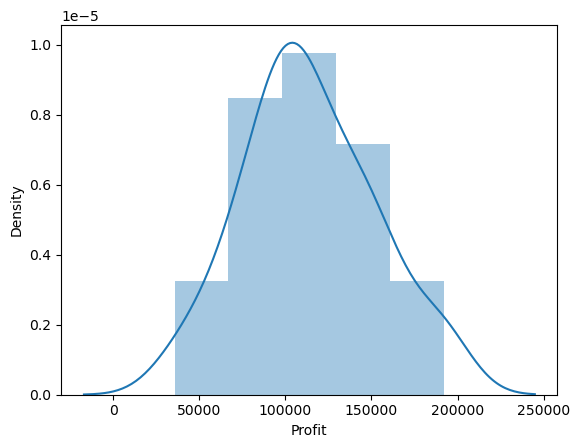

In [105]:
sns.distplot(startup['Profit'],bins=5,kde=True)
plt.show()

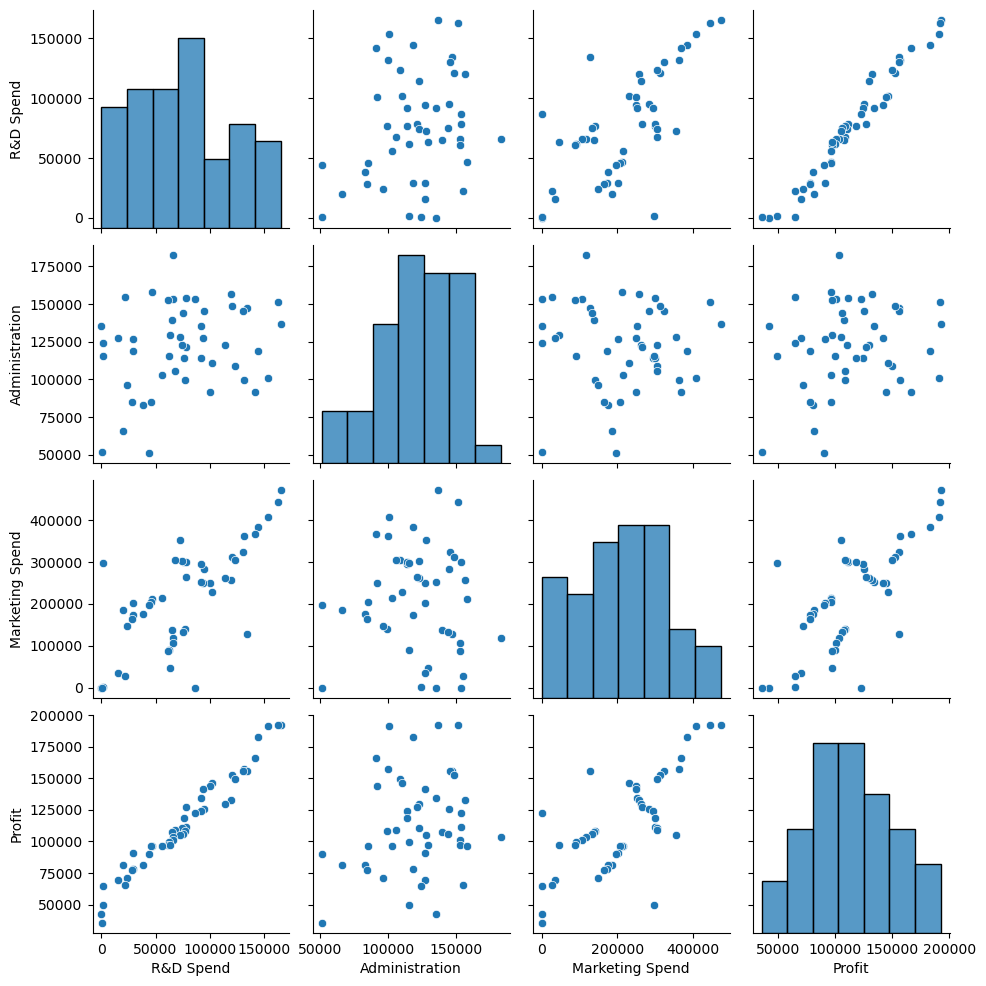

In [101]:
sns.pairplot(startup)
plt.show()

# step 5: EDA on dataset
- Correlation matrix

In [ ]:
c= startup[['R&D Spend','Administration','Marketing Spend','Profit']].corr()
c

In [ ]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

# Step 6: Split the dataset into dependent/independent variables

In [50]:
X = startup.iloc[:, :-1].values
y = startup.iloc[:, 4].values

# Step 7: label encoding
* convert the string values to integer values

In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

0          1          2  3
0   165349.2   136897.8   471784.1  2
1   162597.7  151377.59  443898.53  0
2  153441.51  101145.55  407934.54  1
3  144372.41  118671.85  383199.62  2
4  142107.34   91391.77  366168.42  1

# Step 8: Split data into Train/Test sets

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)

# step 9: Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [58]:
y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)

In [60]:
sc_Y = StandardScaler()
y_train = sc_Y.fit_transform(y_train)
y_test = sc_Y.fit_transform(y_test)

# Step 10: Initialize and train linear regression model.

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Step 11: Predict the result

In [67]:
y_pred = model.predict(x_test)

In [68]:
model.predict([[2,3,4,1]])

array([[1.98479925]])

# Step 12: Model evaluation

In [73]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.8684673521504285
Model Score/Performance on Training data 0.9635364269100082


In [74]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
r2

0.8684673521504285

In [77]:
mse = mean_squared_error(y_test, y_pred) 
print(f"Mean Squared Error: {mse:.2f}") 
print(f"R-Squared Error: {r2:.2f}")

Mean Squared Error: 0.13
R-Squared Error: 0.87


- Comparing the predicted values and actual values

In [108]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  36.26742999573743


In [112]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 0.2594651474465035


In [80]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

Predicted value  Actual Value
0         -0.327181     -0.210021
1          1.396011      1.819073
2         -0.116779     -0.062815
3         -0.350778     -0.243238
4         -0.373104     -0.321364
5         -0.564267     -0.554169
6         -0.693690     -0.343622
7         -0.993855     -0.918666
8          1.051404      1.494231
9          0.507982      1.194438
10         0.514496      1.136459
11        -0.423187     -0.319629
12        -0.409071     -0.341564
13        -0.055890     -0.085391
14        -1.492377     -2.243721